In [1]:
import pandas as pd
import plotly as ply
import plotly.graph_objects as go

<h2>Usage</h2>
<p>
generatePlot( past_csv, predictions_csv, future_csv=None, show=[1,1,1], name="plot.html",title='Predicted sale')
<br>
    
past_csv <- plik csv - past || timestamp, units <br>
predictions_csv <- plik csv - models || timestamp, units1, units2 <br>
future_csv <- plik csv - future opcjonalny || timestamp,units - jeśli nie podany to wektor domyślnie ma 0<br>
show <- wektor [0,1,0] - pokaż predykcje modelu 1, predykcje modelu 2,przyszłe predykcje - domyślny<br>
name <- nazwa pliku docelowego z wygenerowanym wykresem<br>
title <- tytuł wykresu</p>

In [36]:
def plotGiven(name,title,past_p,avaliable,*args):
    #avaliable=[pred1_p, pred2_p,future_p]
    show_vec=[past_p];
    for ix, val in enumerate(args):
        if val==1: 
            show_vec.append(avaliable[ix])
    fig = go.Figure(data=show_vec)
    fig.update_layout(
    title=title,
    xaxis_title='Date',
    yaxis_title='Sold items')
    fig.update_layout(title=dict(font=dict(size=40),xanchor='center'),title_x=0.5,font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))
    fig.show()
    fig.write_html(name)

In [37]:
def generatePlot( past_csv, predictions_csv, future_csv=False, show=[1,1,1], name="plot.html",title='Predicted sale'):
    past = pd.read_csv(past_csv);
    preds = pd.read_csv(predictions_csv);
        
    pred1_p = go.Scatter(x=preds['date'], y=preds['unit_sales_x'], mode='lines', name='Predykcja modelu 1', line=dict(color="#1e6abf"),
                        hovertemplate='<b>Date:</b> %{x}<br><b>Sold Items:</b> %{y}<extra></extra>')
    pred2_p = go.Scatter(x=preds['date'], y=preds['unit_sales_y'], mode='lines', name='Predykcja modelu 2', line=dict(color="#ac1ebf"),
                        hovertemplate='<b>Date:</b> %{x}<br><b>Sold Items:</b> %{y}<extra></extra>')
    past_p = go.Scatter(x=past['date'], y=past['unit_sales'], mode='lines', name='Przeszłość', line=dict(color="#19ae55"),
                       hovertemplate='<b>Date:</b> %{x}<br><b>Sold Items:</b> %{y}<extra></extra>')

    if (future_csv is not False): 
        future_t = pd.read_csv(future_csv)
        future_p = go.Scatter(x=future_t['date'], y=future_t['unit_sales'], mode='lines', name='Faktyczne wyniki', line=dict(color="#aedf2b"))
        plotGiven(name,title,past_p,[pred1_p,pred2_p,future_p],*show)
    else: 
        show[2]=0
        plotGiven(name,title,past_p,[pred1_p,pred2_p,0],*show)

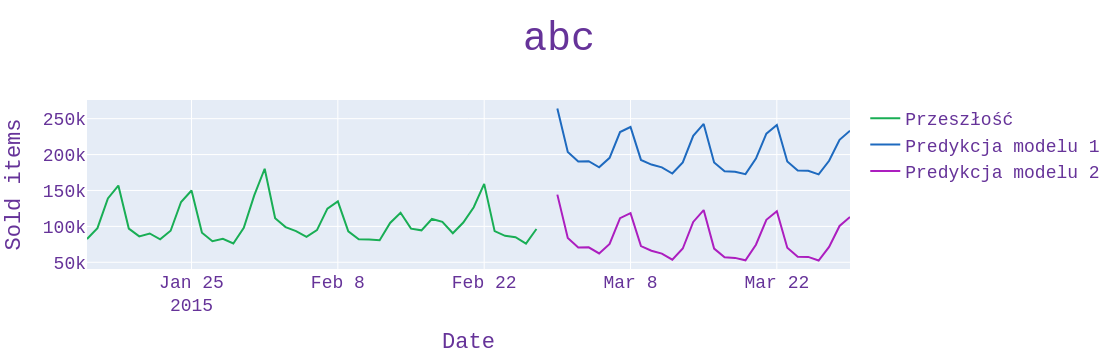

In [38]:
generatePlot('past_serie.csv','preds.csv',show=[1,1,0],name="sample.html",title="abc")